Importando bibliotecas

In [3]:
import time
import matplotlib.pyplot as plt

Função Torre de Hanói com contador de chamadas

In [4]:
def hanoi(n, origem, destino, auxiliar, contador):
    contador[0] += 1
    if n == 1:
        return
    hanoi(n-1, origem, auxiliar, destino, contador)
    hanoi(1, origem, destino, auxiliar, contador)
    hanoi(n-1, auxiliar, destino, origem, contador)

Experimento

In [6]:
valores_n = [5,10,15,20,22,24,26,28,30]
tempos = []
chamadas = []
teorico = []

for n in valores_n:
    contador = [0]
    inicio = time.time()
    hanoi(n, "A", "C", "B", contador)
    fim = time.time()
    tempos.append(fim - inicio)
    chamadas.append(contador[0])
    teorico.append(2**n - 1)

Criando a tabela para exibição com Matplotlib

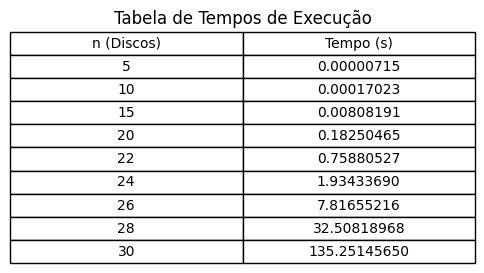

In [7]:

fig, ax = plt.subplots(figsize=(6, 3)) # Cria uma figura e um eixo para a tabela
ax.set_title("Tabela de Tempos de Execução")

# Oculta os eixos para que apenas a tabela seja exibida
ax.axis('off')

# Prepara os dados e cabeçalhos para a tabela
dados_tabela = [[n, f"{tempo:.8f}"] for n, tempo in zip(valores_n, tempos)]
headers = ["n (Discos)", "Tempo (s)"]

# Cria a tabela no gráfico
tabela = ax.table(
    cellText=dados_tabela,
    colLabels=headers,
    loc='center',
    cellLoc='center',
    bbox=[0, 0, 1, 1] # Posição e tamanho da tabela na figura
)

# Ajusta o tamanho da fonte da tabela para melhor visualização
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)
tabela.scale(1.2, 1.2) # Aumenta a escala para melhor leitura

plt.show()

Plotando gráfico 1: Tempo de execução

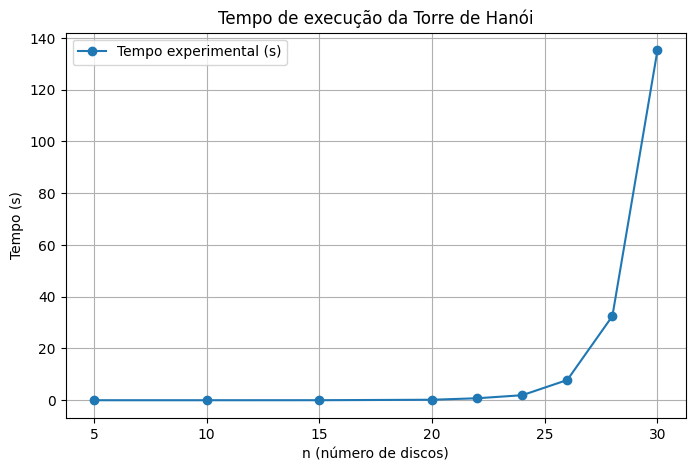

In [8]:
plt.figure(figsize=(8,5))
plt.plot(valores_n, tempos, marker='o', label="Tempo experimental (s)")
plt.xlabel("n (número de discos)")
plt.ylabel("Tempo (s)")
plt.title("Tempo de execução da Torre de Hanói")
plt.legend()
plt.grid(True)
plt.show()

Plotando gráfico 2: Chamadas (experimental vs teórico)

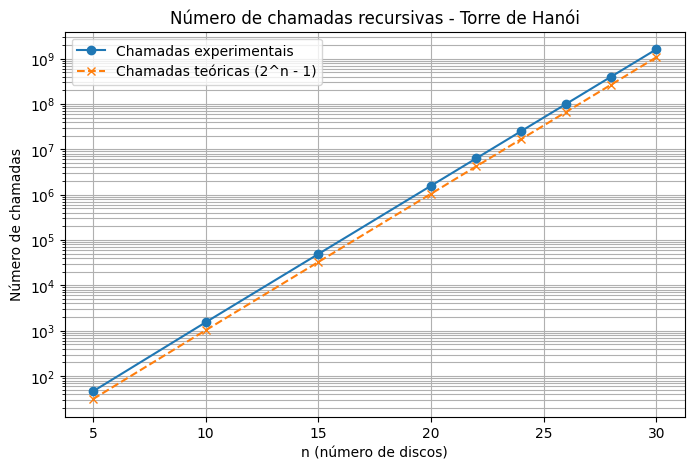

In [9]:
plt.figure(figsize=(8,5))
plt.plot(valores_n, chamadas, marker='o', label="Chamadas experimentais")
plt.plot(valores_n, teorico, marker='x', linestyle="--", label="Chamadas teóricas (2^n - 1)")
plt.xlabel("n (número de discos)")
plt.ylabel("Número de chamadas")
plt.title("Número de chamadas recursivas - Torre de Hanói")
plt.yscale("log")  # escala log para visualizar crescimento exponencial
plt.legend()
plt.grid(True, which="both")
plt.show()